In [2]:
from tesszap.timeseries import Timeseries
from tesszap.strategies import central, mean, lowest
from tesszap.models import Transit, ManyFlares
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

Let's simulate a general timeseries, that's been stacked together using the a Central 8/10 strategy:

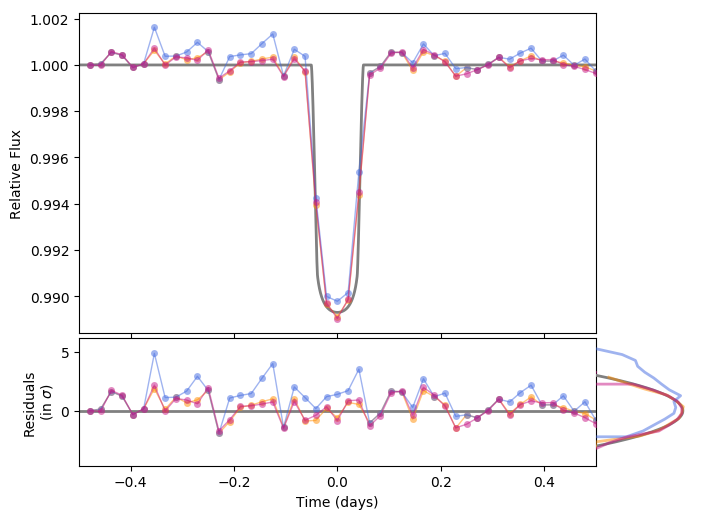

In [3]:
strategy = central(10)
timeseries = Timeseries(model=Transit(a_over_rs=5, period=1.6), 
                                   tmin=-5, tmax=5,
                                   cadence=1800, 
                                   cosmickw=dict(probability=0.001, height=1))
b = timeseries.stack(strategy)
t.plot(xlim=[-.5, 0.5])

100%|██████████| 360/360 [00:15<00:00, 23.58it/s]


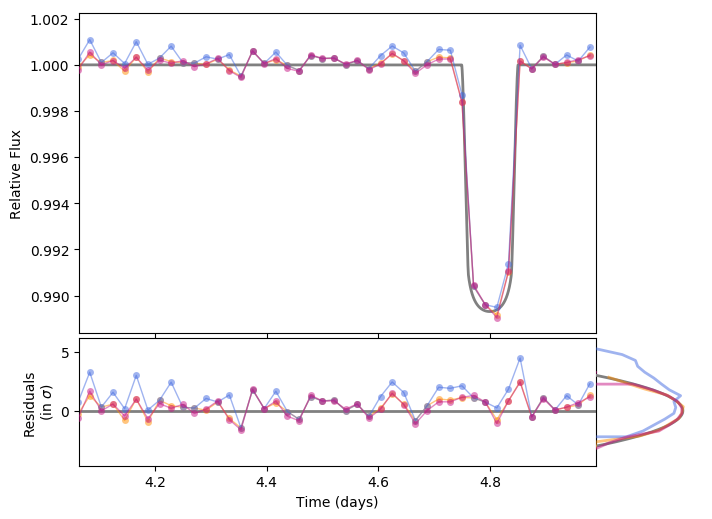

In [4]:
t.movie()

<video controls src="test.mp4" width=800/>

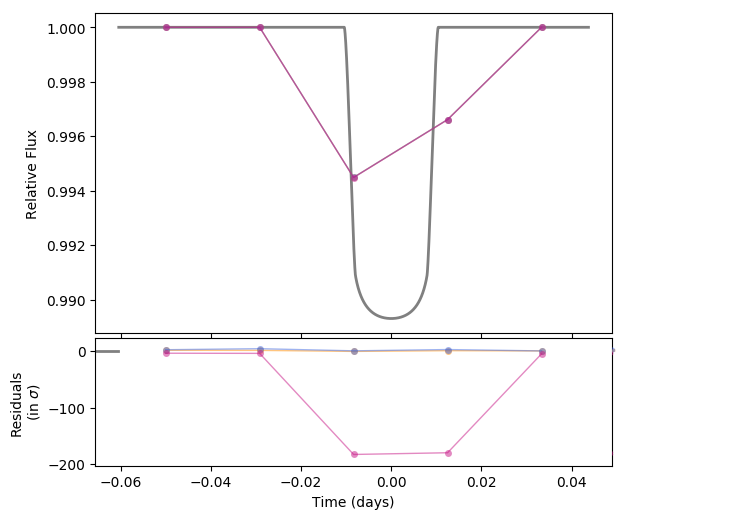

In [3]:
s = lowest(10)
t = OmniscientSubcadenceTimeseries(model=Transit(), 
                                   subcadenceuncertainty=1e-6,
                                   tmin=-.05, tmax=.05,
                                   cadence=1800, 
                                   cosmickw=dict(probability=0.001, height=1))
b = t.stack(s)
t.plot()


0it [00:00, ?it/s]


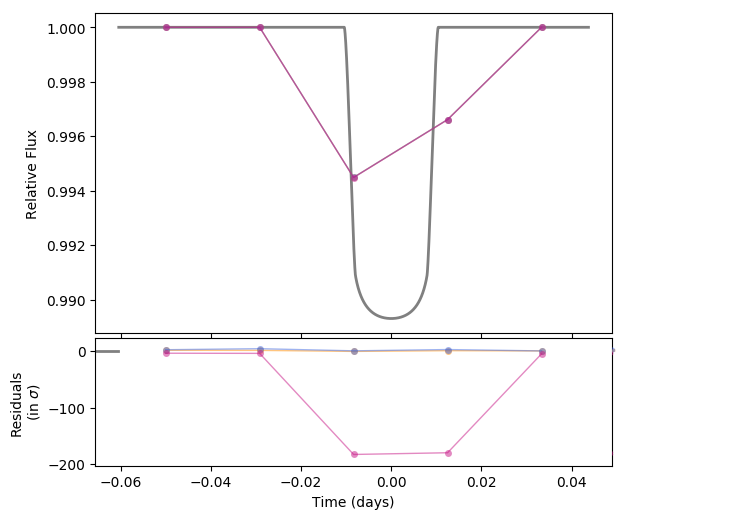

In [4]:
t.movie()

In [5]:
subcadence=2.0
cadence=120.0
dtcadence = cadence/24.0/60.0/60.0
dtsubcadence = subcadence/24.0/60.0/60.0


cadences = np.arange(0, 10, dtcadence)
nsubcadences = np.int(cadence/subcadence)
within = np.arange(-dtcadence/2, dtcadence/2, dtsubcadence)
(cadences[:, np.newaxis] + within[np.newaxis, :]).shape


(7201, 60)

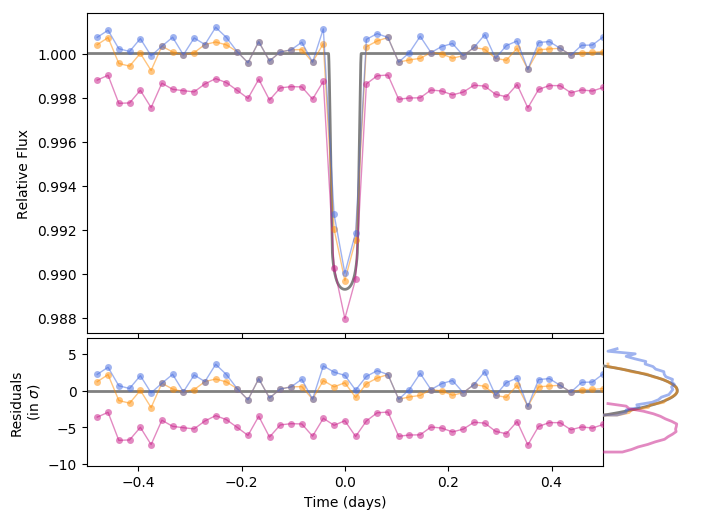

In [6]:
t = OmniscientSubcadenceTimeseries(model=Transit(a_over_rs=5), 
                                   tmin=-15, tmax=15,
                                   cadence=1800, 
                                   cosmickw=dict(probability=0.001, height=1))
b = t.stack(s)
t.plot(xlim=[-.5, 0.5])

The things left to add include:
+ indication of the number of datapoints not shown, but that go into histogram
+ numbers comparing the expected, achieved, and unmitigated
+ title describing the model and the stacking method